<a href="https://colab.research.google.com/github/barcygan/python/blob/master/IMGW_api_pogoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import pliku/API

In [1]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# defining api path 
url = 'https://danepubliczne.imgw.pl/api/data/synop'
#r=requests.get(url)
#data = json.loads(r.data.decode('utf-8'))
#plik = r.json()


#creating dataframe directly from api json call
dataframe = pd.read_json(url)

#dodanie serii danych średniej temperatury


# Tworzenie klasy dla dataframe

In [35]:
class Pogoda():
  def __init__(self, df):
    self.df = df
    self.srednia_temperatura = df['temperatura'].mean()
    self.srednie_cisnienie = df['cisnienie'].mean()
    self.df['srednia_temperatura'] = df['temperatura'].mean()
    self.df['srednie_cisnienie'] = df['cisnienie'].mean()

  # Funkcja pokazująca dostępne parametry
  def show_params(self):
    for x in self.df.columns.values:
      print(x)

  #Definicja funkcji generującej wykresy typu bar prezentujących parametry w zależności od miejsca pomiaru
  def show_bar_overall(self, parameter):

    plt.style.use('seaborn')
    fig,ax = plt.subplots(figsize=(25,5))
    ax.bar(self.df['stacja'],self.df[f'{parameter}'])

    if parameter == 'temperatura':
      ax.plot(self.df['stacja'],self.df['srednia_temperatura'], color = 'red')
    elif parameter == 'cisnienie':
      ax.plot(self.df['stacja'],self.df['srednie_cisnienie'], color = 'red')

    fig.autofmt_xdate()
    plt.show()


  #Definicja funkcji zwracającej typowe wartości (max,avg,sum etc) dla danej serii danych
  def show_parameter_action(self,parametr,action):
    print(f'Wartość wybranego parametru : {self.df[{parametr}].apply(action)}')

    



  

In [36]:
a = Pogoda(dataframe)

In [37]:
a.show_params()

id_stacji
stacja
data_pomiaru
godzina_pomiaru
temperatura
predkosc_wiatru
kierunek_wiatru
wilgotnosc_wzgledna
suma_opadu
cisnienie
srednia_temperatura
srednie_cisnienie


In [38]:
a.show_parameter_action('temperatura', max)

Wartość wybranego parametru : temperatura    8.7
dtype: float64


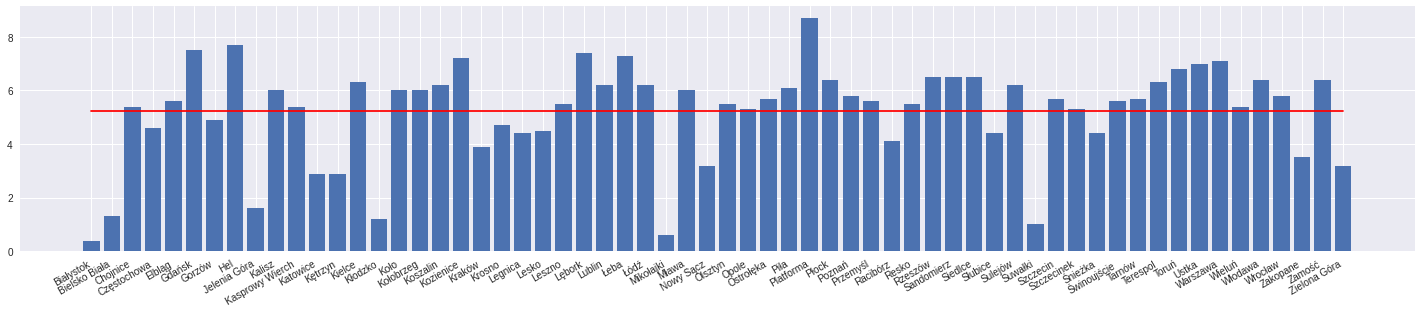

In [39]:
a.show_bar_overall('temperatura')

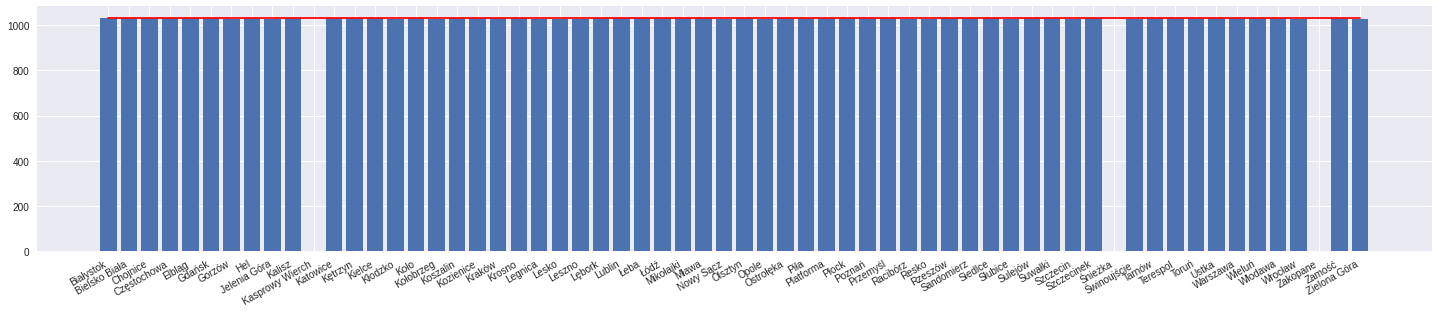

In [ ]:
a.show_bar_overall('cisnienie')